1. Выполните классификацию набора данных с помощью Байесовской классификации, варьируя соотношение мощностей обучающей и тестовой выборок от 60%:40% до 90%:10% с шагом 5%.

Будем использовать датасет genres_pca_100_comp_of_song.csv, полученный в процессе выполнения л/р 2 "Разметка аудиоданных" по предмету "Анализ аудио видео и графической информации". Датасет содержит информацию о музыкальных произведениях 3600 исполнителей (по 300 исполнителей каждого из 12 жанров популярной музыки: рок, поп, регги, шансон и т.д.). У каждого исполнителя было выбрано по 30 музыкальных произведений, из каждого взяты треки по 10 секунд. Эти музыкальные файлы были представлены в виде мел-кепстальных коэффициентов, к которым 2 раза был применен метод главных компонент с сохранением в коэффициентах 90% дисперсии. 

В итоге, файл genres_pca_100_comp_of_song.csv содержит 100 признаков на каждого из 3600 исполнителей. Ставится задача классифицировать их по 12 жанрам. Для простоты считаем, что каждый из исполнителей исполняет только в одном конкретном жанре.

Будем использовать наивную байесовскую классификацию. Используем модель Gaussian из библиотеки scikit-learn. Модель данного типа используется в случае непрерывных признаков и предполагает, что значения признаков имеют нормальное распределение.

In [7]:
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [8]:
#датасет genres_pca_100_comp_of_song.csv

def measure(y_test, y_test_predict, genres):
    #conf matrix
    conf_matrix = pd.DataFrame(np.zeros((12, 12)), index = genres, columns = genres)
    for y, y_p in zip(y_test_predict, y_test):
        conf_matrix.loc[y_p, y] += 1
        
    #accuracy
    accuracy = 0
    for y_p, y in zip(y_test_predict, y_test):
        if y_p == y:
            accuracy += 1
    accuracy /= y_test.shape[0]
    
    #precision
    temp = list()
    for genre in genres:
        temp.append(conf_matrix.loc[genre, genre] / np.sum(conf_matrix.loc[genre, :]))
    precision = np.mean(temp)
    
    #recall
    temp = list()
    for genre in genres:
        temp.append(conf_matrix.loc[genre, genre] / np.sum(conf_matrix.loc[:, genre]))
    recall = np.mean(temp)
    
    #f_measure
    f_measure = 2 * precision * recall / (precision + recall)
  
    return conf_matrix, accuracy, precision, recall, f_measure

if __name__ == '__main__':
    song = pd.read_csv('genres_pca_100_comp_of_song.csv') #genres_pca_mfcc_small.csv
    Y = np.array(song['class'])
    X = np.array(song[[str(i) for i in range(100)]])
    genres = np.unique(Y)
    #print(genres)
    result_table = list()
    for test_size in range(40, 9, -5):
        print(f'Модель с мощностью обучающей выборки {100-test_size}%, тестовой выборки {test_size}%')
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size / 100, shuffle = True, random_state = 42)

        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_test_predict = clf.predict(X_test)
        
        confusion_matrix, accuracy, precision, recall, f_measure = measure(y_test, y_test_predict, genres)
        print(f'confusion_matrix \n{confusion_matrix}\n accuracy = {accuracy}\n' +
              f' precision = {precision}\n recall = {recall}\n f_measure = {f_measure}\n')
        result_table.append([test_size, accuracy, precision, recall, f_measure])
    result = pd.DataFrame(result_table, columns = ['test_size', 'accuracy', 'precision', 'recall', 'f_measure'])
    result.to_csv("result_measure_100.csv")
    print(result)    

Модель с мощностью обучающей выборки 60%, тестовой выборки 40%
confusion_matrix 
                allrock  blues  country  electronic  hip-hop  jazz  \
allrock            26.0    4.0     10.0        17.0      8.0   2.0   
blues              17.0   24.0     20.0         8.0      5.0  11.0   
country            12.0   18.0     17.0         7.0     10.0  10.0   
electronic         15.0    4.0      6.0        44.0     18.0   5.0   
hip-hop             8.0    2.0      5.0        24.0     19.0   3.0   
jazz                2.0    7.0      6.0        15.0      5.0  28.0   
latin-american      3.0    1.0      8.0        12.0      5.0   7.0   
pop                 9.0    2.0      4.0        16.0     15.0   1.0   
r-n-b               6.0    4.0      5.0        14.0     16.0   3.0   
reggae              3.0    5.0      4.0        22.0     22.0   3.0   
shanson             2.0    1.0      4.0         1.0      1.0   2.0   
world               4.0    9.0      4.0         7.0     12.0  10.0   

        

   test_size  accuracy  precision    recall  f_measure
0         40  0.210029   0.210172  0.202401   0.206213
1         35  0.216777   0.215384  0.210634   0.212982
2         30  0.219961   0.219467  0.214247   0.216826
3         25  0.213953   0.211909  0.206328   0.209081
4         20  0.210756   0.212184  0.206128   0.209112
5         15  0.211240   0.214478  0.216799   0.215632
6         10  0.247093   0.245036  0.243074   0.244051


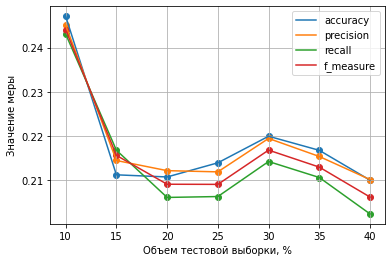

In [12]:
#графическое представление мер
fig, ax = plt.subplots()
for m in ['accuracy', 'precision', 'recall', 'f_measure']:
    x = result['test_size']
    y = result[m]
    f = interp1d(x, y, kind='linear')
    y_smooth=f(x)

    ax.plot (x, y_smooth, label = m)
    ax.scatter (x, y) 

    ax.set_xlabel('Объем тестовой выборки, %')
    ax.set_ylabel('Значение меры')
    ax.legend()
    
ax.grid()
plt.show()

In [13]:
#датасет genres_pca_4*12920_comp_of_song.csv (без выделения главных компонент по шкале времени)

def measure(y_test, y_test_predict, genres):
    #conf matrix
    conf_matrix = pd.DataFrame(np.zeros((12, 12)), index = genres, columns = genres)
    for y, y_p in zip(y_test_predict, y_test):
        conf_matrix.loc[y_p, y] += 1
        
    #accuracy
    accuracy = 0
    for y_p, y in zip(y_test_predict, y_test):
        if y_p == y:
            accuracy += 1
    accuracy /= y_test.shape[0]
    
    #precision
    temp = list()
    for genre in genres:
        temp.append(conf_matrix.loc[genre, genre] / np.sum(conf_matrix.loc[genre, :]))
    precision = np.mean(temp)
    
    #recall
    temp = list()
    for genre in genres:
        temp.append(conf_matrix.loc[genre, genre] / np.sum(conf_matrix.loc[:, genre]))
    recall = np.mean(temp)
    
    #f_measure
    f_measure = 2 * precision * recall / (precision + recall)
  
    return conf_matrix, accuracy, precision, recall, f_measure

if __name__ == '__main__':
    song = pd.read_csv('genres_pca_4na12920_comp_of_song.csv') #genres_pca_mfcc_small.csv
    print(song.shape)
    Y = np.array(song['class'])
    X = np.array(song[[str(i) for i in range(4*12920)]])
    genres = np.unique(Y)
    #print(genres)
    result_table = list()
    for test_size in range(40, 9, -5):
        print(f'Модель с мощностью обучающей выборки {100-test_size}%, тестовой выборки {test_size}%')
        
        X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = test_size / 100, shuffle = True, random_state = 42)

        clf = GaussianNB()
        clf.fit(X_train, y_train)
        y_test_predict = clf.predict(X_test)
        
        confusion_matrix, accuracy, precision, recall, f_measure = measure(y_test, y_test_predict, genres)
        print(f'confusion_matrix \n{confusion_matrix}\n accuracy = {accuracy}\n' +
              f' precision = {precision}\n recall = {recall}\n f_measure = {f_measure}\n')
        result_table.append([test_size, accuracy, precision, recall, f_measure])
    result = pd.DataFrame(result_table, columns = ['test_size', 'accuracy', 'precision', 'recall', 'f_measure'])
    result.to_csv("result_measure_4na12920.csv")
    print(result)    

(3438, 51681)
Модель с мощностью обучающей выборки 60%, тестовой выборки 40%
confusion_matrix 
                allrock  blues  country  electronic  hip-hop  jazz  \
allrock            52.0    7.0     14.0         9.0      7.0   6.0   
blues              31.0   34.0     11.0         3.0      7.0  20.0   
country            20.0   23.0     24.0         3.0      3.0  17.0   
electronic         14.0    5.0      3.0        21.0     18.0  15.0   
hip-hop             8.0    2.0      4.0        20.0     26.0   5.0   
jazz                1.0   11.0      4.0         1.0      6.0  76.0   
latin-american      6.0    5.0      7.0         3.0     13.0  17.0   
pop                 5.0    0.0      4.0         4.0     15.0   5.0   
r-n-b               9.0    8.0      8.0         5.0     20.0   9.0   
reggae              1.0    2.0      2.0        13.0     26.0   5.0   
shanson             7.0    2.0      4.0         0.0      3.0   2.0   
world               8.0    4.0      7.0         0.0      4.0  26.

confusion_matrix 
                allrock  blues  country  electronic  hip-hop  jazz  \
allrock            32.0    7.0      8.0         3.0      7.0   5.0   
blues              19.0   22.0      7.0         1.0      3.0   8.0   
country            12.0   10.0     13.0         2.0      1.0   8.0   
electronic         10.0    1.0      6.0         9.0     10.0   7.0   
hip-hop             2.0    1.0      2.0         4.0     12.0   3.0   
jazz                0.0    7.0      1.0         0.0      2.0  38.0   
latin-american      2.0    2.0      5.0         1.0      5.0   9.0   
pop                 2.0    0.0      0.0         1.0      8.0   1.0   
r-n-b               6.0    5.0      5.0         2.0     11.0   5.0   
reggae              1.0    1.0      0.0         3.0     13.0   1.0   
shanson             1.0    0.0      1.0         0.0      3.0   1.0   
world               5.0    3.0      2.0         0.0      4.0  13.0   

                latin-american   pop  r-n-b  reggae  shanson  world  
a

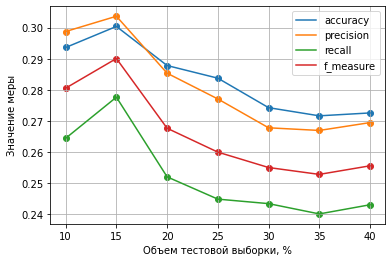

In [14]:
#графическое представление мер
fig, ax = plt.subplots()
for m in ['accuracy', 'precision', 'recall', 'f_measure']:
    x = result['test_size']
    y = result[m]
    f = interp1d(x, y, kind='linear')
    y_smooth=f(x)

    ax.plot (x, y_smooth, label = m)
    ax.scatter (x, y) 

    ax.set_xlabel('Объем тестовой выборки, %')
    ax.set_ylabel('Значение меры')
    ax.legend()
    
ax.grid()
plt.show()